In [1]:
import pandas as pd
import numpy as np

In [2]:
btc_data = pd.read_csv('../../btc_data.csv')
btc_1h_data = pd.read_csv('../../btc_1h_data.csv')

In [3]:
btc_data.head()

,Timestamp,Date,Time,Open,High,Low,Close,Volume
0,2023-01-15 00:00:00,15/01/2023,00:00:00,20876.31,20898.00,20872.22,20887.33,192.84874
1,2023-01-15 00:01:00,15/01/2023,00:01:00,20887.33,20889.78,20875.34,20881.24,122.27002
2,2023-01-15 00:02:00,15/01/2023,00:02:00,20882.40,20884.02,20872.97,20874.46,64.88027
3,2023-01-15 00:03:00,15/01/2023,00:03:00,20873.41,20875.87,20863.02,20864.59,126.67576
4,2023-01-15 00:04:00,15/01/2023,00:04:00,20865.61,20867.27,20827.31,20844.88,309.61303


In [4]:
btc_1h_data.head()

,Unnamed: 0,open_time,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
0,2022-01-01 00:00:00,1.640995e+12,46216.93,46731.39,46208.37,46656.13,1503.33095,1.640999e+12,6.987999e+07,38608.0,806.06536,3.746216e+07,0.0
1,2022-01-01 01:00:00,1.640999e+12,46656.14,46949.99,46574.06,46778.14,943.81539,1.641002e+12,4.412715e+07,31872.0,491.18067,2.296327e+07,0.0
2,2022-01-01 02:00:00,1.641002e+12,46778.14,46928.94,46721.96,46811.77,485.16860,1.641006e+12,2.272067e+07,24364.0,206.35113,9.662607e+06,0.0
3,2022-01-01 03:00:00,1.641006e+12,46811.77,46916.63,46760.12,46813.20,562.88971,1.641010e+12,2.636326e+07,19882.0,248.28212,1.162938e+07,0.0
4,2022-01-01 04:00:00,1.641010e+12,46813.21,46887.33,46591.23,46711.05,861.88389,1.641013e+12,4.027204e+07,23357.0,397.53563,1.857540e+07,0.0


In [5]:
btc_data.shape

(403121, 8)

In [6]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403121 entries, 0 to 403120
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  403121 non-null  object 
 1   Date       403121 non-null  object 
 2   Time       403121 non-null  object 
 3   Open       403121 non-null  float64
 4   High       403121 non-null  float64
 5   Low        403121 non-null  float64
 6   Close      403121 non-null  float64
 7   Volume     403121 non-null  float64
dtypes: float64(5), object(3)
memory usage: 24.6+ MB


In [7]:
btc_data['Timestamp'].min(), btc_data['Timestamp'].max()

('2023-01-15 00:00:00', '2023-10-22 00:00:00')

In [8]:
date_format = '%Y-%m-%d %H:%M:%S'

In [9]:
features = ['Timestamp', 'Open', "High", "Low", "Close", "Volume"]
X = btc_data[features].copy(deep=True)
X['Timestamp'] = pd.to_datetime(X['Timestamp'], format=date_format)

In [10]:
X.head()

,Timestamp,Open,High,Low,Close,Volume
0,2023-01-15 00:00:00,20876.31,20898.00,20872.22,20887.33,192.84874
1,2023-01-15 00:01:00,20887.33,20889.78,20875.34,20881.24,122.27002
2,2023-01-15 00:02:00,20882.40,20884.02,20872.97,20874.46,64.88027
3,2023-01-15 00:03:00,20873.41,20875.87,20863.02,20864.59,126.67576
4,2023-01-15 00:04:00,20865.61,20867.27,20827.31,20844.88,309.61303


In [11]:
# for i in range(X.shape[0] - 1):
#     if X.Timestamp.iloc[i] > X.Timestamp.iloc[i + 1]:
#         break
#         print('Non monotonic')
    
#     if (X.Timestamp.iloc[i + 1] -X.Timestamp.iloc[i]) != timedelta(minutes=1):
#         break
#         print('Non monotonic')

In [12]:
def create_features_from_previos_5_min(X):
    """X is increasing by timestamp"""
    for i in range(1, 6):
        for feature in ['Open', "High", "Low", "Close", "Volume"]:
            X[f'{feature}_{i}min_before'] = X[feature].shift(i)
    return X
X = create_features_from_previos_5_min(X)
X = X.dropna()
y = X['Close'].copy(deep=True)
X = X.drop(columns=['Close', 'High', 'Low', 'Volume'])
X.head()

,Timestamp,Open,Open_1min_before,High_1min_before,Low_1min_before,Close_1min_before,Volume_1min_before,Open_2min_before,High_2min_before,Low_2min_before,...,Open_4min_before,High_4min_before,Low_4min_before,Close_4min_before,Volume_4min_before,Open_5min_before,High_5min_before,Low_5min_before,Close_5min_before,Volume_5min_before
5,2023-01-15 00:05:00,20843.72,20865.61,20867.27,20827.31,20844.88,309.61303,20873.41,20875.87,20863.02,...,20887.33,20889.78,20875.34,20881.24,122.27002,20876.31,20898.00,20872.22,20887.33,192.84874
6,2023-01-15 00:06:00,20866.37,20843.72,20870.53,20828.28,20866.37,179.98974,20865.61,20867.27,20827.31,...,20882.40,20884.02,20872.97,20874.46,64.88027,20887.33,20889.78,20875.34,20881.24,122.27002
7,2023-01-15 00:07:00,20911.06,20866.37,20927.83,20859.64,20911.12,481.11856,20843.72,20870.53,20828.28,...,20873.41,20875.87,20863.02,20864.59,126.67576,20882.40,20884.02,20872.97,20874.46,64.88027
8,2023-01-15 00:08:00,20891.43,20911.06,20911.06,20886.84,20890.85,196.06623,20866.37,20927.83,20859.64,...,20865.61,20867.27,20827.31,20844.88,309.61303,20873.41,20875.87,20863.02,20864.59,126.67576
9,2023-01-15 00:09:00,20894.10,20891.43,20904.68,20889.55,20894.10,104.67781,20911.06,20911.06,20886.84,...,20843.72,20870.53,20828.28,20866.37,179.98974,20865.61,20867.27,20827.31,20844.88,309.61303


In [13]:
from datetime import datetime, timedelta

In [14]:
X['Timestamp'].max() - timedelta(10)

Timestamp('2023-10-12 00:00:00')

In [15]:
testing_days = 10
testing_thresh = X['Timestamp'].max() - timedelta(testing_days)

# mask to grab the days for training and testing
training_mask = X.Timestamp <= testing_thresh
testing_mask = X.Timestamp > testing_thresh
X = X.drop(columns=['Timestamp'])

# subset and make training and validation sets
X_train, X_val, y_train, y_val = X[training_mask], X[testing_mask], y[training_mask], y[testing_mask] #train_test_split(X, y, test_size=0.20, random_state=0, shuffle=True, stratify=X['stock_id']) # random_state=8
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((388716, 26), (14400, 26), (388716,), (14400,))

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Close'>

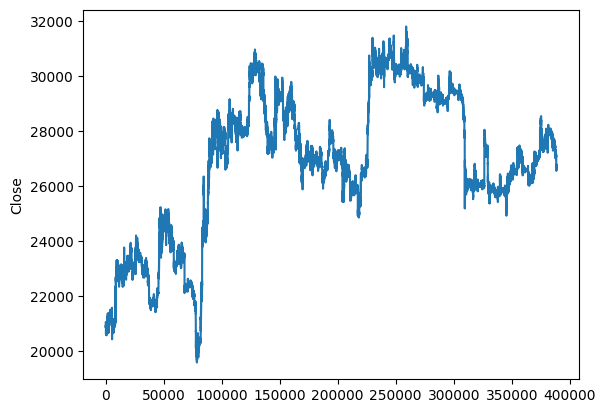

In [17]:
sns.lineplot(y_train)

<Axes: >

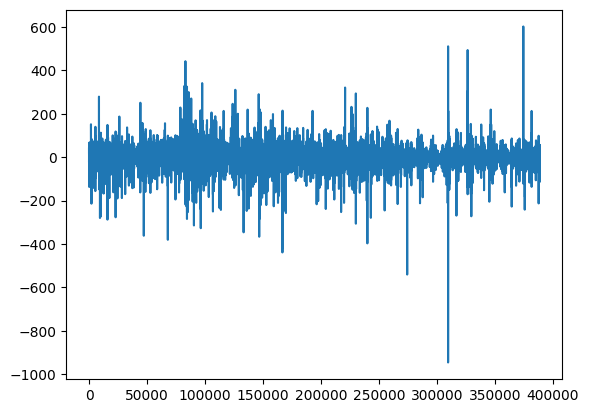

In [18]:
sns.lineplot(y_train - X_train['Close_1min_before'])

<Axes: ylabel='Count'>

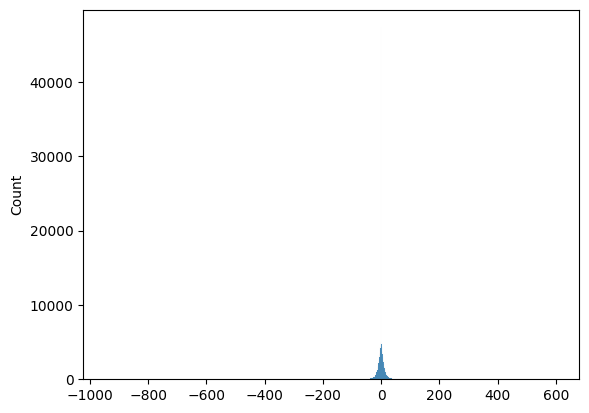

In [19]:
sns.histplot(y_train - X_train['Close_1min_before'])

<Axes: ylabel='Count'>

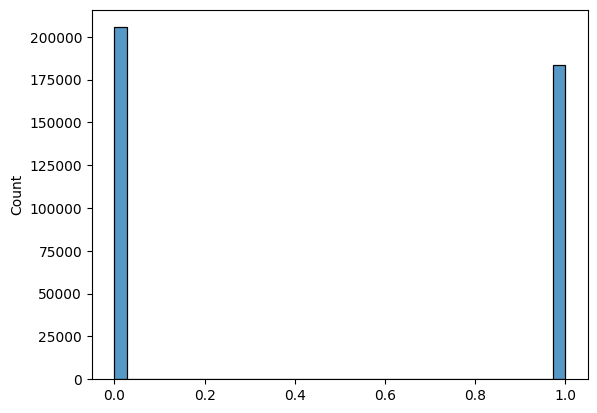

In [20]:
sns.histplot((y_train - X_train['Close_1min_before']) > 0)

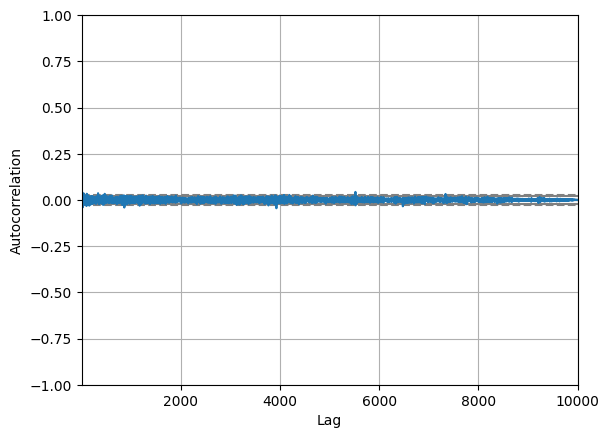

In [21]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot((y_train - X_train['Close_1min_before'])[:10000])
plt.show()

In [22]:
def subtract_baseline(data, baseline_series, columns_ignore=None):
    new_data = data.copy()
    for col in data:
        if columns_ignore is not None:
            if col in columns_ignore:
                continue
        new_data[col] -= baseline_series
    return new_data

In [23]:
[s for s in X_train.columns if 'Volume' in s]

['Volume_1min_before',
 'Volume_2min_before',
 'Volume_3min_before',
 'Volume_4min_before',
 'Volume_5min_before']

In [33]:
X_subtracted_train = subtract_baseline(X_train, X_train['Close_1min_before'], columns_ignore={
    'Volume_1min_before',
    'Volume_2min_before',
    'Volume_3min_before',
    'Volume_4min_before',
    'Volume_5min_before'
})
y_subtracted_train = y_train - X_train['Close_1min_before']

X_subtracted_val = subtract_baseline(X_val, X_val['Close_1min_before'], columns_ignore={
    'Volume_1min_before',
    'Volume_2min_before',
    'Volume_3min_before',
    'Volume_4min_before',
    'Volume_5min_before'
})
y_subtracted_val = y_val - X_val['Close_1min_before']

In [34]:
from catboost import CatBoostRegressor, CatBoostClassifier
from catboost import EShapCalcType, EFeaturesSelectionAlgorithm
from catboost import Pool
from sklearn.metrics import mean_absolute_error

In [35]:
train_pool = Pool(data=X_subtracted_train, label=y_subtracted_train)
val_pool = Pool(data=X_subtracted_val, label=y_subtracted_val)

In [36]:
# params = dict(loss_function='MAE',
#               score_function='Cosine',
#               eval_metric = 'MAE',
#               metric_period=100,
#               task_type='GPU',
#               od_type='Iter',
#               od_wait=20,
#               verbose=200,
#               random_seed=7,
#               border_count=32,
#               use_best_model=True,
#               bootstrap_type='Bernoulli',
#               subsample=0.90,
#               random_strength=3, # more bagging to reduce overfitting
#               depth=9,
#               l2_leaf_reg=8,
#               learning_rate=0.057,
#               )

print("--------------Performing Feature Selection----------------")
# model = CatBoostRegressor(**params)
model = CatBoostRegressor()

--------------Performing Feature Selection----------------


In [37]:
np.sign(X_subtracted_train['Close_2min_before'])

5         1.0
6        -1.0
7        -1.0
8         1.0
9        -1.0
         ... 
388716   -1.0
388717    1.0
388718   -1.0
388719    1.0
388720   -1.0
Name: Close_2min_before, Length: 388716, dtype: float64

In [38]:
params = {'depth': 4, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.05}
params =  {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.05}
params = {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 1, 'learning_rate': 0.05}
final_model = CatBoostRegressor(**params)
# final_model = CatBoostRegressor()
final_model.fit(X_subtracted_train, #[summary['selected_features_names']],  # 
                y_subtracted_train,
               eval_set=(X_subtracted_val, y_subtracted_val)) # [summary['selected_features_names']]

print("-----Predicting with the reduced set model-----------")
y_val_pred = final_model.predict(X_subtracted_val) # [summary['selected_features_names']]
y_val_mae = mean_absolute_error(y_val, y_val_pred + X_val['Close_1min_before'])
print(f"MAE on validation set: {np.round(y_val_mae, 4)}")

0:	learn: 15.3718003	test: 17.7684870	best: 17.7684870 (0)	total: 184ms	remaining: 18.3s
1:	learn: 15.3608168	test: 17.7684491	best: 17.7684491 (1)	total: 212ms	remaining: 10.4s
2:	learn: 15.3501696	test: 17.7699076	best: 17.7684491 (1)	total: 240ms	remaining: 7.75s
3:	learn: 15.3398121	test: 17.7679541	best: 17.7679541 (3)	total: 268ms	remaining: 6.43s
4:	learn: 15.3304889	test: 17.7656867	best: 17.7656867 (4)	total: 301ms	remaining: 5.72s
5:	learn: 15.3218895	test: 17.7703536	best: 17.7656867 (4)	total: 334ms	remaining: 5.23s
6:	learn: 15.3144724	test: 17.7709124	best: 17.7656867 (4)	total: 363ms	remaining: 4.82s
7:	learn: 15.3111588	test: 17.7752601	best: 17.7656867 (4)	total: 390ms	remaining: 4.49s
8:	learn: 15.3035682	test: 17.7732174	best: 17.7656867 (4)	total: 424ms	remaining: 4.28s
9:	learn: 15.2964442	test: 17.7719929	best: 17.7656867 (4)	total: 454ms	remaining: 4.09s
10:	learn: 15.2896606	test: 17.7702389	best: 17.7656867 (4)	total: 487ms	remaining: 3.94s
11:	learn: 15.286170

## search hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# Initialize CatBoostClassifier
model = CatBoostRegressor(verbose=0, use_best_model=True)

# Define the parameter grid
param_grid = {
    'iterations': [100, 200, 400],
    'depth': [4, 6],
    'learning_rate': [0.01, 0.05],
    'l2_leaf_reg': [1, 3, 5],
    # 'iterations': [100, 200, 500],
    # 'depth': [4, 6, 8, 10],
    # 'learning_rate': [0.01, 0.05, 0.1, 0.3],
    # 'l2_leaf_reg': [1, 3, 5, 7, 9],
    # 'border_count': [32, 64, 128],
    # 'ctr_border_count': [50, 100, 200],
    # 'thread_count': [4, 8, 16]
    # You can add more parameters here
}

tscv = TimeSeriesSplit(n_splits=3)

# Set up GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_absolute_error', verbose=3)

# Fit the model
grid.fit(X_subtracted_train, #[summary['selected_features_names']],  # 
        y_subtracted_train,
        eval_set=(X_subtracted_val, y_subtracted_val))
print("Best parameters found: ", grid.best_params_)
print("Best MAE found: ", -grid.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01;, score=-9.851 total time=   0.9s
[CV 2/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01;, score=-8.018 total time=   1.5s
[CV 3/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.01;, score=-6.429 total time=   2.0s
[CV 1/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.05;, score=-9.851 total time=   0.8s
[CV 2/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.05;, score=-8.023 total time=   1.4s
[CV 3/3] END depth=4, iterations=100, l2_leaf_reg=1, learning_rate=0.05;, score=-6.455 total time=   2.0s
[CV 1/3] END depth=4, iterations=100, l2_leaf_reg=3, learning_rate=0.01;, score=-9.851 total time=   0.8s
[CV 2/3] END depth=4, iterations=100, l2_leaf_reg=3, learning_rate=0.01;, score=-8.019 total time=   1.4s
[CV 3/3] END depth=4, iterations=100, l2_leaf_reg=3, learning_rate=0.01;, score=-6.429 tot

KeyboardInterrupt: 

In [ ]:
mean_absolute_error(y_subtracted_val, y_val_pred)

8.594079201857685

In [ ]:
final_model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Volume_1min_before,24.020672
1,Low_1min_before,23.699252
2,Volume_4min_before,19.914497
3,High_1min_before,8.641880
4,Volume_5min_before,6.963142
5,Volume_2min_before,4.366393
6,Close_4min_before,3.011277
7,Close_5min_before,1.940104
8,High_4min_before,1.596777
9,Open_5min_before,1.467113


In [ ]:
mean_absolute_error(y_val, y_val_pred + X_val['Close_1min_before'])

8.589953394906397

In [ ]:
mean_absolute_error(y_val, X_val['Close_1min_before'])

8.581495833333356

In [ ]:
mean_absolute_error(y, X['Close_1min_before'])

8.732093194018614

In [39]:
from sklearn.linear_model import LinearRegression, Ridge, SGDClassifier

In [46]:
import random
from tqdm import tqdm
from itertools import product

def enchance_features(data, capacity=300):
    new_features = []
    columns = data.columns
    def sub(x, y):
        return data[x] - data[y]
    def add(x, y):
        return data[x] - data[y]
    def mult(x, y):
        return data[x] * data[y]
    def div(x, y):
        return data[x] / (data[y] + 1e-6)
    def log(x, y):
        return np.sign(data[x]) * np.log(np.abs(data[x]))
    def exp(x, y):
        return np.exp(data[x])
    

    for args in tqdm(product(columns, repeat=2)):
        for func in [sub, add, mult, div, log, exp]:
            new_features.append(pd.Series(func(*args), name=f'{func.__name__}({args[0]}, {args[1]})'))
            if len(new_features) >= capacity:
                return new_features
    
    return new_features

In [47]:
new_X_train_features = enchance_features(X_subtracted_train)
new_X_val_features = enchance_features(X_subtracted_val)

0it [00:00, ?it/s]c:\Users\Stepan\Documents\Startups\BitcoinTrading\.venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
24it [00:00, 38.24it/s]c:\Users\Stepan\Documents\Startups\BitcoinTrading\.venv\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
49it [00:01, 43.93it/s]
49it [00:00, 583.08it/s]


In [48]:
_slice = slice(0, 300)

X_subtracted_and_enchanced_train = pd.concat([X_subtracted_train] + new_X_train_features[_slice], axis=1)
X_subtracted_and_enchanced_val = pd.concat([X_subtracted_val] + new_X_val_features[_slice], axis=1)

In [49]:
X_subtracted_and_enchanced_train.head()

,Open,Open_1min_before,High_1min_before,Low_1min_before,Close_1min_before,Volume_1min_before,Open_2min_before,High_2min_before,Low_2min_before,Close_2min_before,...,"mult(Open_1min_before, High_5min_before)","div(Open_1min_before, High_5min_before)","log(Open_1min_before, High_5min_before)","exp(Open_1min_before, High_5min_before)","sub(Open_1min_before, Low_5min_before)","add(Open_1min_before, Low_5min_before)","mult(Open_1min_before, Low_5min_before)","div(Open_1min_before, Low_5min_before)","log(Open_1min_before, Low_5min_before)","exp(Open_1min_before, Low_5min_before)"
5,-1.16,20.73,22.39,-17.57,0.0,309.61303,28.53,30.99,18.14,19.71,...,1101.1776,0.390248,3.031582,1.006757e+09,-6.61,-6.61,566.7582,0.758230,3.031582,1.006757e+09
6,0.00,-22.65,4.16,-38.09,0.0,179.98974,-0.76,0.90,-39.06,-21.49,...,-530.2365,-0.967535,-3.120160,1.456230e-10,-31.62,-31.62,-203.1705,-2.525083,-3.120160,1.456230e-10
7,-0.06,-44.75,16.71,-51.48,0.0,481.11856,-67.40,-40.59,-82.84,-44.75,...,1212.7250,1.651292,-3.801091,3.675547e-20,-6.60,-6.60,1707.2125,1.173001,-3.801091,3.675547e-20
8,0.58,20.21,20.21,-4.01,0.0,196.06623,-24.48,36.98,-31.21,20.27,...,-302.7458,-1.349132,3.006178,5.985377e+08,48.04,48.04,-562.4443,-0.726195,3.006178,5.985377e+08
9,0.00,-2.67,10.58,-4.55,0.0,104.67781,16.96,16.96,-7.26,-3.25,...,71.6361,0.099515,-0.982078,6.925223e-02,64.12,64.12,178.3293,0.039976,-0.982078,6.925223e-02


In [58]:
X_subtracted_and_enchanced_train = X_subtracted_and_enchanced_train.fillna(0).replace([np.inf, -np.inf], 0)
X_subtracted_and_enchanced_val = X_subtracted_and_enchanced_val.fillna(0).replace([np.inf, -np.inf], 0)

In [59]:
linear_model = LinearRegression()
linear_model.fit(X_subtracted_train, #[summary['selected_features_names']],  # 
                y_subtracted_train) # [summary['selected_features_names']]

print("-----Predicting with the reduced set model-----------")
y_val_pred = linear_model.predict(X_subtracted_val) # [summary['selected_features_names']]
y_val_mae = mean_absolute_error(y_subtracted_val, y_val_pred)
print(f"MAE on validation set: {np.round(y_val_mae, 4)}")
print(f"baseline MAE on validation set: {np.round(mean_absolute_error(y_val, X_val['Close_1min_before']), 4)}")


-----Predicting with the reduced set model-----------
MAE on validation set: 8.6105
baseline MAE on validation set: 8.5815


In [60]:
linear_model = LinearRegression()
linear_model.fit(X_subtracted_and_enchanced_train, #[summary['selected_features_names']],  # 
                y_subtracted_train) # [summary['selected_features_names']]

print("-----Predicting with the reduced set model-----------")
y_val_pred = linear_model.predict(X_subtracted_and_enchanced_val) # [summary['selected_features_names']]
y_val_mae = mean_absolute_error(y_subtracted_val, y_val_pred)
print(f"MAE on validation set: {np.round(y_val_mae, 4)}")
print(f"baseline MAE on validation set: {np.round(mean_absolute_error(y_val, X_val['Close_1min_before']), 4)}")

-----Predicting with the reduced set model-----------
MAE on validation set: 8.5825
baseline MAE on validation set: 8.5815


In [ ]:
linear_model.coef_, linear_model.intercept_

(array([ 5.28821382e-01, -1.34892879e-01, -1.83670590e-02,  1.62428125e-02,
         4.90220405e-01,  1.35264150e-03,  3.17308954e-01,  1.17343640e-02,
        -1.65024884e-02,  1.07900640e-01, -7.36345528e-04, -1.95215762e-01,
        -2.95897305e-02, -1.06487619e-02, -2.90189160e-01,  5.16215037e-04,
        -1.14009487e-01,  1.87318664e-02, -7.33027189e-03,  2.08591998e-01,
        -1.20859546e-03, -1.59885045e-02,  1.81535096e-02,  8.23722542e-03,
         1.06774734e-01,  1.92478308e-04]),
 0.3628515361051541)

In [ ]:
X.columns

Index(['Open', 'Open_1min_before', 'High_1min_before', 'Low_1min_before',
       'Close_1min_before', 'Volume_1min_before', 'Open_2min_before',
       'High_2min_before', 'Low_2min_before', 'Close_2min_before',
       'Volume_2min_before', 'Open_3min_before', 'High_3min_before',
       'Low_3min_before', 'Close_3min_before', 'Volume_3min_before',
       'Open_4min_before', 'High_4min_before', 'Low_4min_before',
       'Close_4min_before', 'Volume_4min_before', 'Open_5min_before',
       'High_5min_before', 'Low_5min_before', 'Close_5min_before',
       'Volume_5min_before'],
      dtype='object')

In [ ]:
linear_model = Ridge()
linear_model.fit(X_train, #[summary['selected_features_names']],  # 
                y_train) # [summary['selected_features_names']]

print("-----Predicting with the reduced set model-----------")
y_val_pred = linear_model.predict(X_val) # [summary['selected_features_names']]
y_val_mae = mean_absolute_error(y_val, y_val_pred)
print(f"MAE on validation set: {np.round(y_val_mae, 4)}")
print(f"baseline MAE on validation set: {np.round(mean_absolute_error(y_val, X_val['Close_1min_before']), 4)}")

y_train_mae = mean_absolute_error(y, linear_model.predict(X))
print(f"MAE on train set: {np.round(y_train_mae, 4)}")
print(f"baseline MAE on train set: {np.round(mean_absolute_error(y, X['Close_1min_before']), 4)}")

-----Predicting with the reduced set model-----------
MAE on validation set: 8.6108
baseline MAE on validation set: 8.5815
MAE on train set: 8.7453
baseline MAE on train set: 8.7321


In [ ]:
# linear_model = SGDClassifier(penalty='l1')
# linear_model.fit(X_train, #[summary['selected_features_names']],  # 
#                 y_train) # [summary['selected_features_names']]

# print("-----Predicting with the reduced set model-----------")
# y_val_pred = linear_model.predict(X_val) # [summary['selected_features_names']]
# y_val_mae = mean_absolute_error(y_val, y_val_pred)
# print(f"MAE on validation set: {np.round(y_val_mae, 4)}")
# print(f"baseline MAE on validation set: {np.round(mean_absolute_error(y_val, X_val['Close_1min_before']), 4)}")

# y_train_mae = mean_absolute_error(y, linear_model.predict(X))
# print(f"MAE on train set: {np.round(y_train_mae, 4)}")
# print(f"baseline MAE on train set: {np.round(mean_absolute_error(y, X['Close_1min_before']), 4)}")

In [ ]:
import matplotlib.pyplot as plt

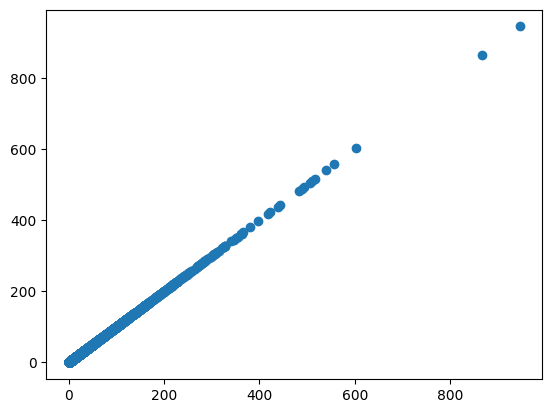

In [ ]:
# plt.hist(np.abs((y -X['Close_1min_before']).to_numpy()), bins=100)
plt.scatter(np.abs((y -X['Close_1min_before']).to_numpy()), np.abs((y -X['Close_1min_before']).to_numpy()))

In [ ]:
np.percentile(np.abs((y -X['Close_1min_before'])), 90)

20.389999999999418

In [ ]:
np.percentile(np.abs((y_train -X_train['Close_1min_before'])), 80)

13.450000000000728

In [ ]:
mask_filtered_X = np.abs(y_train -X_train['Close_1min_before']) < np.percentile(np.abs((y_train -X_train['Close_1min_before'])), 80)

In [ ]:
X_filtered, y_filtered = X_train[mask_filtered_X], y_train[mask_filtered_X]

In [ ]:
linear_model = Ridge()
linear_model.fit(X_filtered, #[summary['selected_features_names']],  # 
                y_filtered) # [summary['selected_features_names']]

print("-----Predicting with the reduced set model-----------")
y_val_pred = linear_model.predict(X_val) # [summary['selected_features_names']]
y_val_mae = mean_absolute_error(y_val, y_val_pred)
print(f"MAE on validation set: {np.round(y_val_mae, 4)}")
print(f"baseline MAE on validation set: {np.round(mean_absolute_error(y_val, X_val['Close_1min_before']), 4)}")
print(f"baseline2 MAE on validation set: {np.round(mean_absolute_error(y_val, 0.5 * (X_val['Close_1min_before'] + X_val['Open'])), 4)}")

y_train_mae = mean_absolute_error(y_filtered, linear_model.predict(X_filtered))
print(f"MAE on train set: {np.round(y_train_mae, 4)}")
print(f"baseline MAE on train set: {np.round(mean_absolute_error(y_filtered, X_filtered['Close_1min_before']), 4)}")
print(f"baseline2 MAE on train set: {np.round(mean_absolute_error(y_filtered, 0.5 * (X_filtered['Close_1min_before'] + X_filtered['Open'])), 4)}")

-----Predicting with the reduced set model-----------
MAE on validation set: 8.5923
baseline MAE on validation set: 8.5815
baseline2 MAE on validation set: 8.5814
MAE on train set: 4.4498
baseline MAE on train set: 4.4427
baseline2 MAE on train set: 4.4426


In [ ]:
linear_model.coef_

array([ 1.70222287e-01, -3.83082507e-02,  5.33910577e-03,  3.03697961e-03,
        8.18399004e-01, -1.98564982e-05,  1.75468642e-02, -4.10890071e-03,
       -1.79073108e-03,  3.37835408e-02,  2.83947262e-04,  6.42028990e-02,
       -9.77925739e-03, -5.22109826e-03, -4.52165686e-03,  4.66188921e-04,
        5.32287315e-02,  2.91560534e-04, -3.72007478e-04, -5.73121957e-02,
       -3.08058762e-04,  9.96471636e-03, -2.71538439e-03, -9.92899480e-03,
       -4.19498935e-02, -4.28443951e-04])